In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
hello = pd.read_csv('bank-additional-full.csv',sep=';')
hello.head(n=10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
X=hello[['age','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
y=hello['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.31,random_state=86)

In [4]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [5]:
knn.score(X_test,y_test)

0.8903594643276685

In [6]:
n_neighbors = 1
model1 = make_pipeline(StandardScaler(),KNeighborsClassifier())
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [7]:
model1.score(X_test, y_test)

0.8916908136894041

<AxesSubplot:xlabel='age', ylabel='y'>

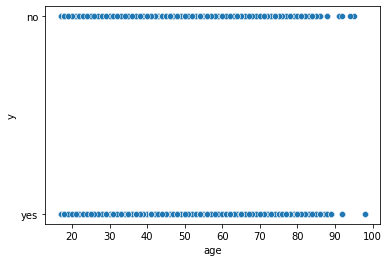

In [8]:
sns.scatterplot(x='age',y='y',data=hello)

<AxesSubplot:xlabel='campaign', ylabel='y'>

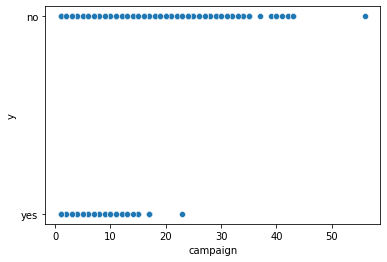

In [9]:
sns.scatterplot(x='campaign',y='y',data=hello)

<AxesSubplot:xlabel='pdays', ylabel='y'>

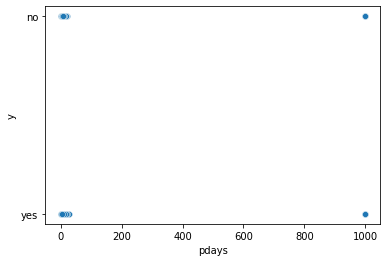

In [10]:
sns.scatterplot(x='pdays',y='y',data=hello)

<AxesSubplot:xlabel='emp.var.rate', ylabel='y'>

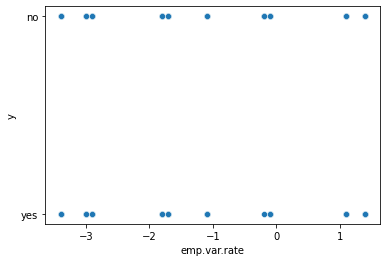

In [11]:
sns.scatterplot(x='emp.var.rate',y='y',data=hello)

<AxesSubplot:xlabel='cons.price.idx', ylabel='y'>

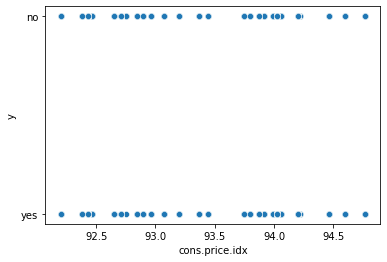

In [12]:
sns.scatterplot(x='cons.price.idx',y='y',data=hello)

<AxesSubplot:xlabel='cons.conf.idx', ylabel='y'>

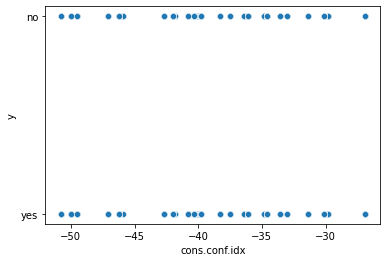

In [13]:
sns.scatterplot(x='cons.conf.idx',y='y',data=hello)

<AxesSubplot:xlabel='euribor3m', ylabel='y'>

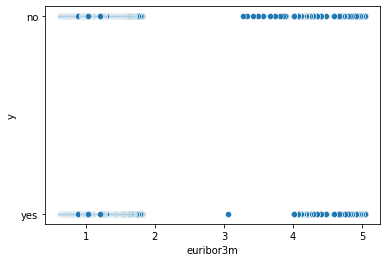

In [14]:
sns.scatterplot(x='euribor3m',y='y',data=hello)

<AxesSubplot:xlabel='nr.employed', ylabel='y'>

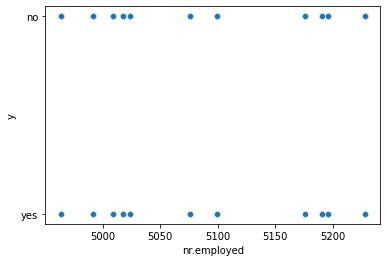

In [15]:
sns.scatterplot(x='nr.employed',y='y',data=hello)

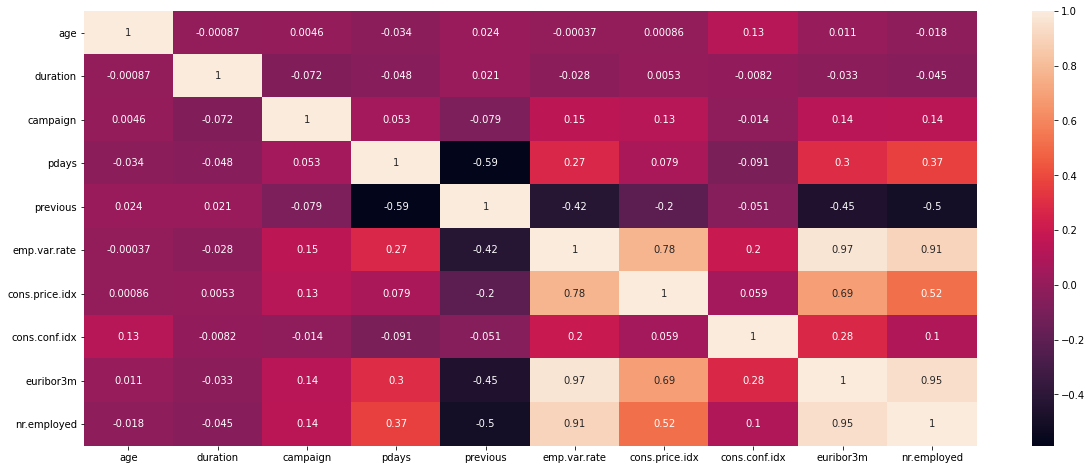

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(hello.corr(), annot=True)
plt.show()

In [17]:
model2=make_pipeline(StandardScaler(),PCA(n_components=0.95),LogisticRegression())
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [18]:
model2.score(X_test,y_test)

0.8996005951914794